In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("Data_and_Train_Data/train_data.xlsx")
df.head()

,Book_Stall,Genre,Week_Date,Sales_in_a_week,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [3]:
df = df[["Week_Date","Sales_in_a_week"]]
df.head()

,Week_Date,Sales_in_a_week
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [4]:
df.dtypes

Week_Date          datetime64[ns]
Sales_in_a_week           float64
dtype: object

In [5]:
df.isna().sum()

Week_Date          0
Sales_in_a_week    0
dtype: int64

In [6]:
## Cleaning up the data
df.columns=["Month","Sales"]
df.head()

,Month,Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [7]:
df.tail()

,Month,Sales
293699,2012-07-13,0.02
293700,2012-07-20,0.02
293701,2012-08-24,0.02
293702,2012-08-31,0.02
293703,2012-09-07,0.02


In [8]:
df.head()

,Month,Sales
0,2010-02-05,24924.50
1,2010-02-12,46039.49
2,2010-02-19,41595.55
3,2010-02-26,19403.54
4,2010-03-05,21827.90


In [9]:
df.set_index('Month',inplace=True)

In [13]:
# df[df["Sales"] < 0]

In [14]:
df.describe()

,Sales
count,293704.000000
mean,17121.330293
std,23959.975137
min,-4988.940000
25%,2634.670000
50%,8352.060000
75%,21598.077500
max,693099.360000


## Step 2: Visualize the Data

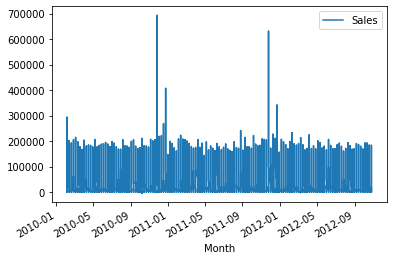

In [15]:
df.plot()

In [13]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [14]:
test_result=adfuller(df['Sales'])

In [15]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [16]:
adfuller_test(df['Sales'])

ADF Test Statistic : -25.576840602783566
p-value : 0.0
#Lags Used : 89
Number of Observations Used : 293614
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


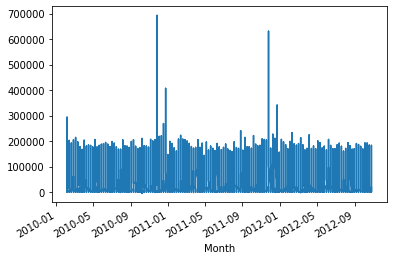

In [14]:
df['Sales'].plot()

## Auto Regressive Model
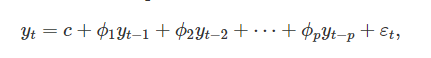

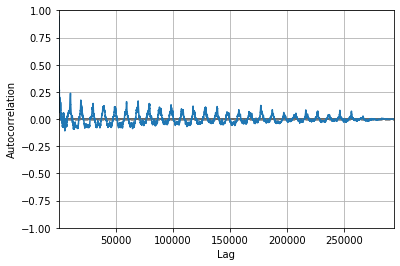

In [23]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['Sales'])
plt.show()

In [24]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

In [16]:
test = pd.read_excel("test_sales.xlsx")
test = test[["Week_Date"]]

In [17]:
df

,Sales
Month,
2010-02-05,24924.50
2010-02-12,46039.49
2010-02-19,41595.55
2010-02-26,19403.54
2010-03-05,21827.90
...,...
2012-07-13,0.02
2012-07-20,0.02
2012-08-24,0.02


In [18]:
test

,Week_Date
0,2012-11-02
1,2012-11-09
2,2012-11-16
3,2012-11-23
4,2012-11-30
...,...
80016,2013-07-05
80017,2013-07-12
80018,2013-07-19
80019,2013-07-26


In [19]:
test.columns = ["Month"]

In [20]:
test.set_index("Month",inplace=True)

In [21]:
test

""
Month
2012-11-02
2012-11-09
2012-11-16
2012-11-23
2012-11-30
...
2013-07-05
2013-07-12
2013-07-19


In [22]:
# df1 = df.copy()
# df1

# test1 = test.copy()
# test1

# new_df = pd.concat([df1,test1])

# new_df[0:len(df1)]

# new_df[len(df1):]

In [23]:
# new_df.fillna(0,inplace=True)

In [24]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima_model import ARIMA

In [25]:
model=ARIMA(df['Sales'],order=(1,1,0))
model_fit=model.fit()

C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning

In [105]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Sales   No. Observations:               293703
Model:                 ARIMA(1, 1, 0)   Log Likelihood            -3038744.553
Method:                       css-mle   S.D. of innovations           7535.489
Date:                Thu, 19 Nov 2020   AIC                        6077495.107
Time:                        17:59:57   BIC                        6077526.878
Sample:                             1   HQIC                       6077504.304
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0849     10.374     -0.008      0.993     -20.418      20.248
ar.L1.D.Sales    -0.3403      0.002   -196.145      0.000      -0.344      -0.337
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9383           +0.0000j            2.9383            0.5000
-----------------------------------------------------------------------------
"""

In [29]:
model_fit.predict(start=120,end=150,dynamic=True)

Month
2012-05-25   -120.450096
2012-06-01     40.878720
2012-06-08    -14.025891
2012-06-15      4.659650
2012-06-22     -1.699551
2012-06-29      0.464660
2012-07-06     -0.271880
2012-07-13     -0.021216
2012-07-20     -0.106524
2012-07-27     -0.077491
2012-08-03     -0.087372
2012-08-10     -0.084009
2012-08-17     -0.085153
2012-08-24     -0.084764
2012-08-31     -0.084897
2012-09-07     -0.084851
2012-09-14     -0.084867
2012-09-21     -0.084862
2012-09-28     -0.084863
2012-10-05     -0.084863
2012-10-12     -0.084863
2012-10-19     -0.084863
2012-10-26     -0.084863
2010-02-05     -0.084863
2010-02-12     -0.084863
2010-02-19     -0.084863
2010-02-26     -0.084863
2010-03-05     -0.084863
2010-03-12     -0.084863
2010-03-19     -0.084863
2010-03-26     -0.084863
dtype: float64

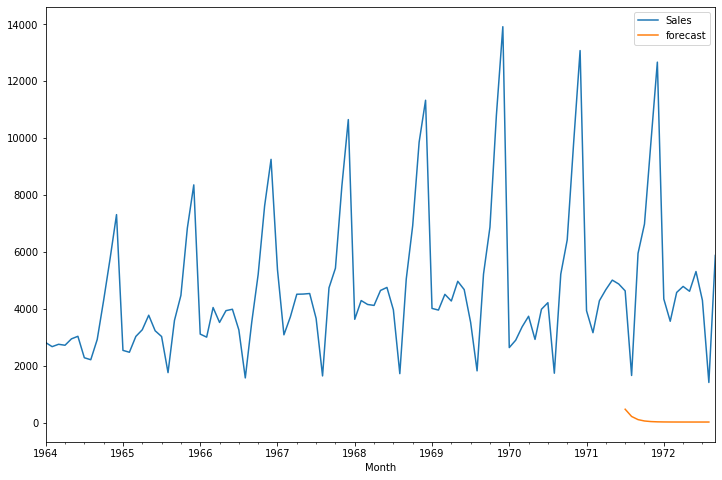

In [49]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [123]:
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(new_df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning)
C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\aakas\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:222: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  ' forecasting.', ValueWarning

In [ ]:
results.predict(start=90,end=103,dynamic=True)

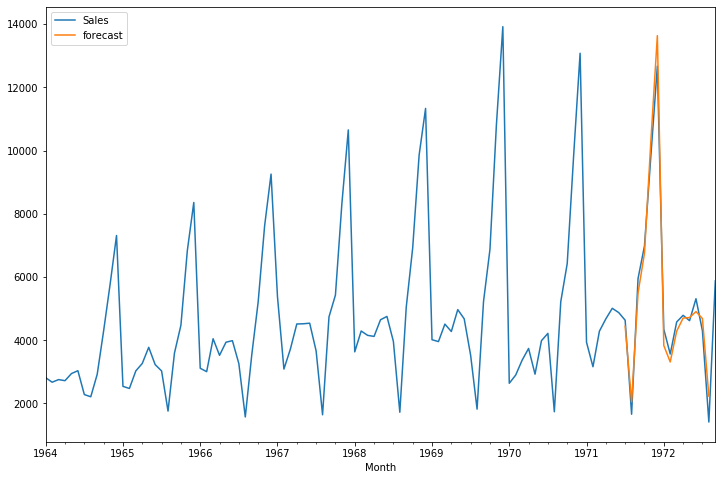

In [52]:
df['forecast']=results.predict(start=90,end=103,dynamic=True)
df[['Sales','forecast']].plot(figsize=(12,8))

In [53]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [54]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [55]:
future_datest_df.tail()

,Sales,Sales First Difference,Seasonal First Difference,forecast
1974-04-01,NaN,NaN,NaN,NaN
1974-05-01,NaN,NaN,NaN,NaN
1974-06-01,NaN,NaN,NaN,NaN
1974-07-01,NaN,NaN,NaN,NaN
1974-08-01,NaN,NaN,NaN,NaN


In [56]:
future_df=pd.concat([df,future_datest_df])

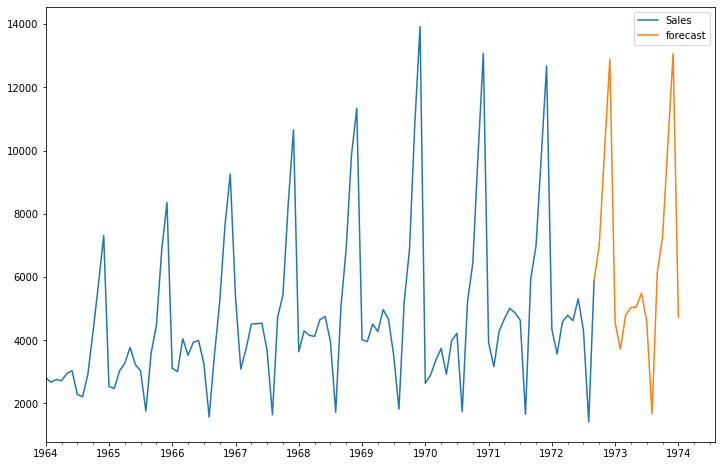

In [57]:
future_df['forecast'] = results.predict(start = 104, end = 120, dynamic= True)  
future_df[['Sales', 'forecast']].plot(figsize=(12, 8)) 